In [1]:
import numpy as np
import torchvision
import torch
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import math
from IPython.display import clear_output
from tqdm import tqdm
from scipy.ndimage import gaussian_filter
import scipy.signal as sps
import matplotlib.ticker as ticker
import pandas as pd
%matplotlib inline

## CA1 visualise

In [ ]:
ca1_df = pd.read_csv("all_record_CA1.csv")
data_no_filter = np.array(ca1_df['x'])
data = gaussian_filter(data_no_filter, sigma=3, radius=20)

In [ ]:
stresshold = -0.0245

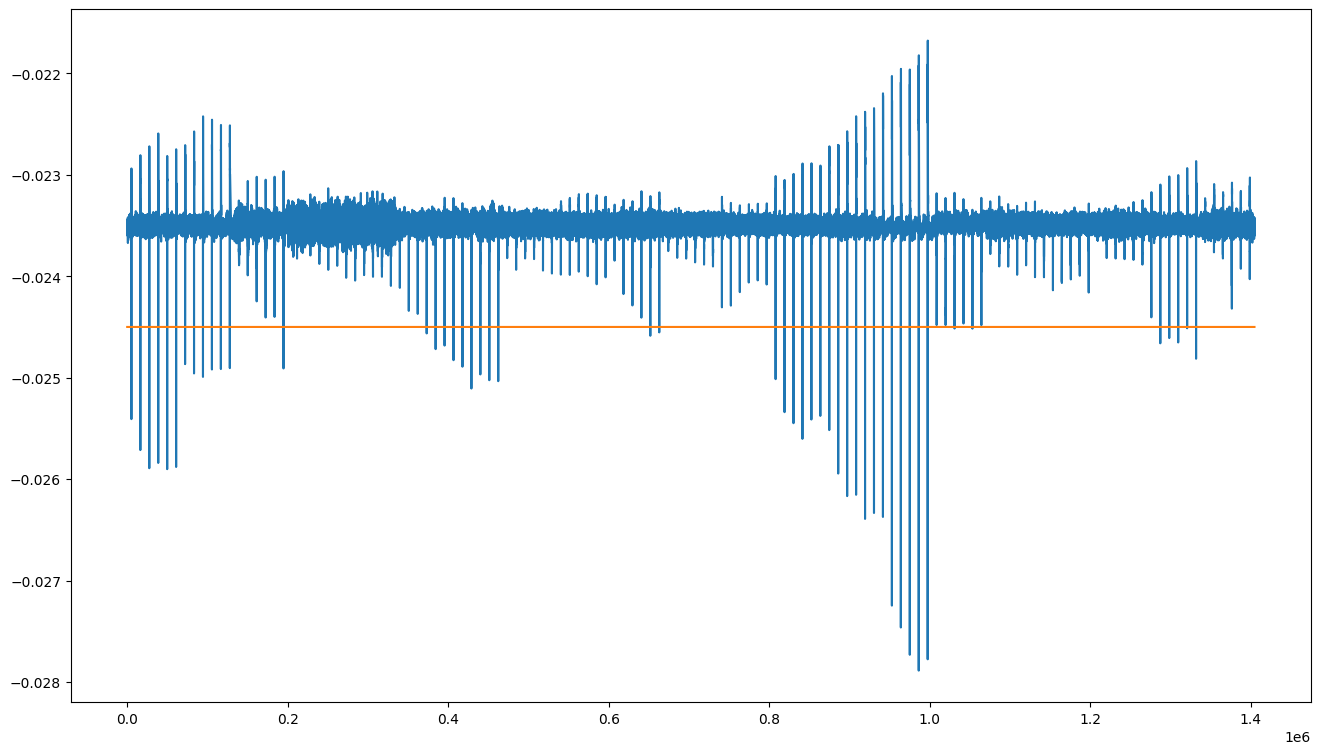

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter)
plt.plot([stresshold] * len(data_no_filter))


In [ ]:
0.2*1e6

200000.0

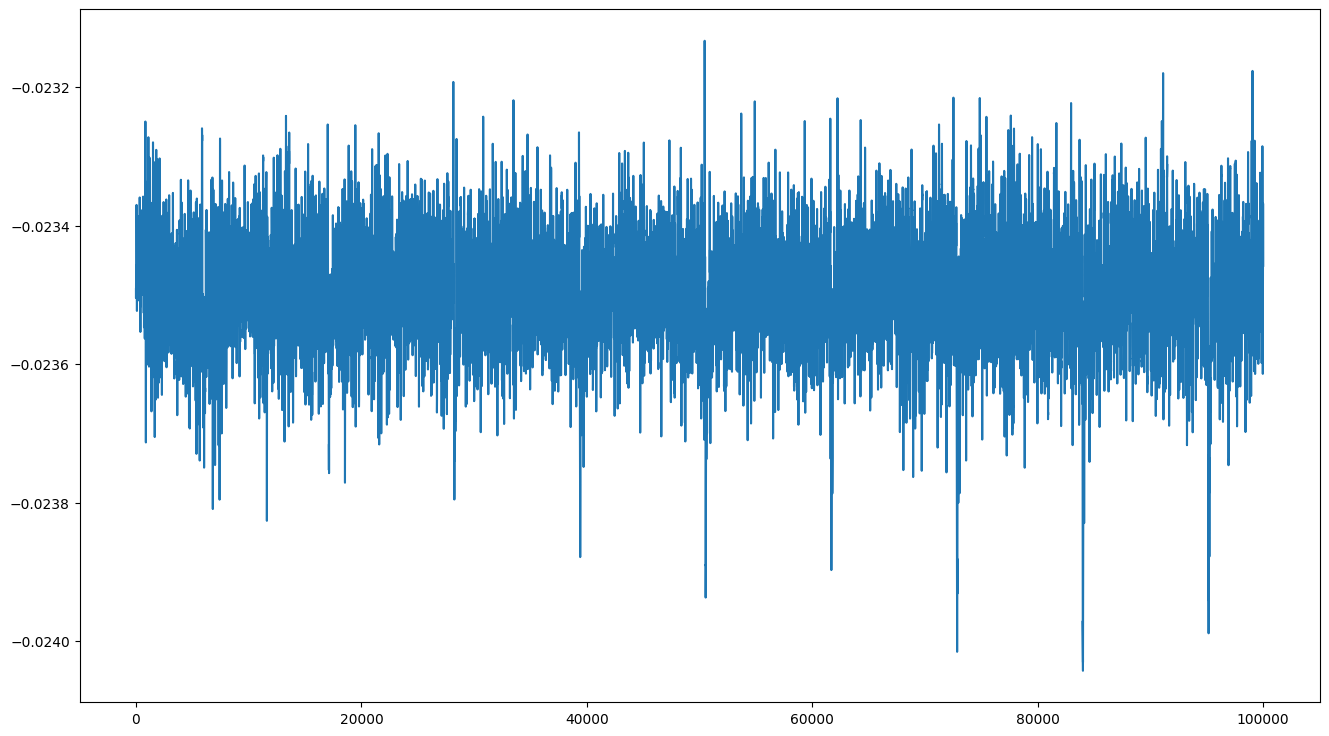

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter[200000:300000])

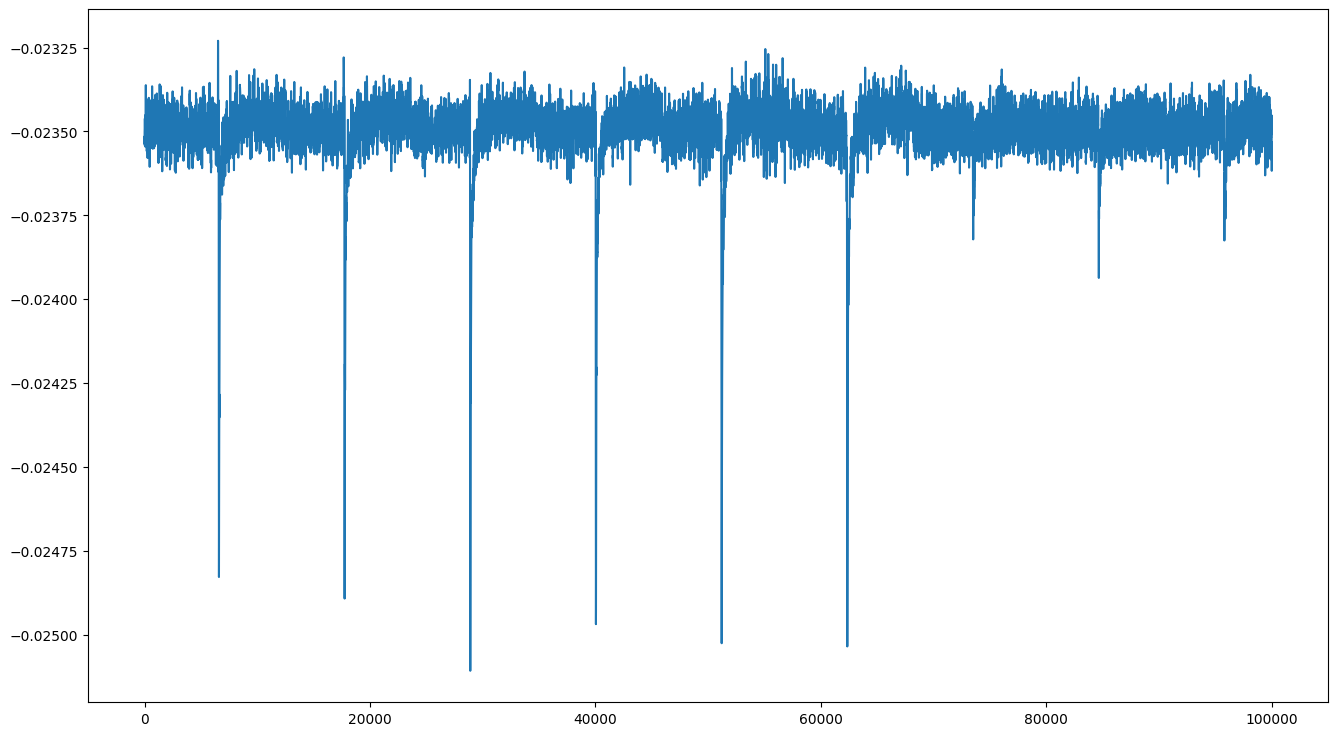

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter[400000:500000])

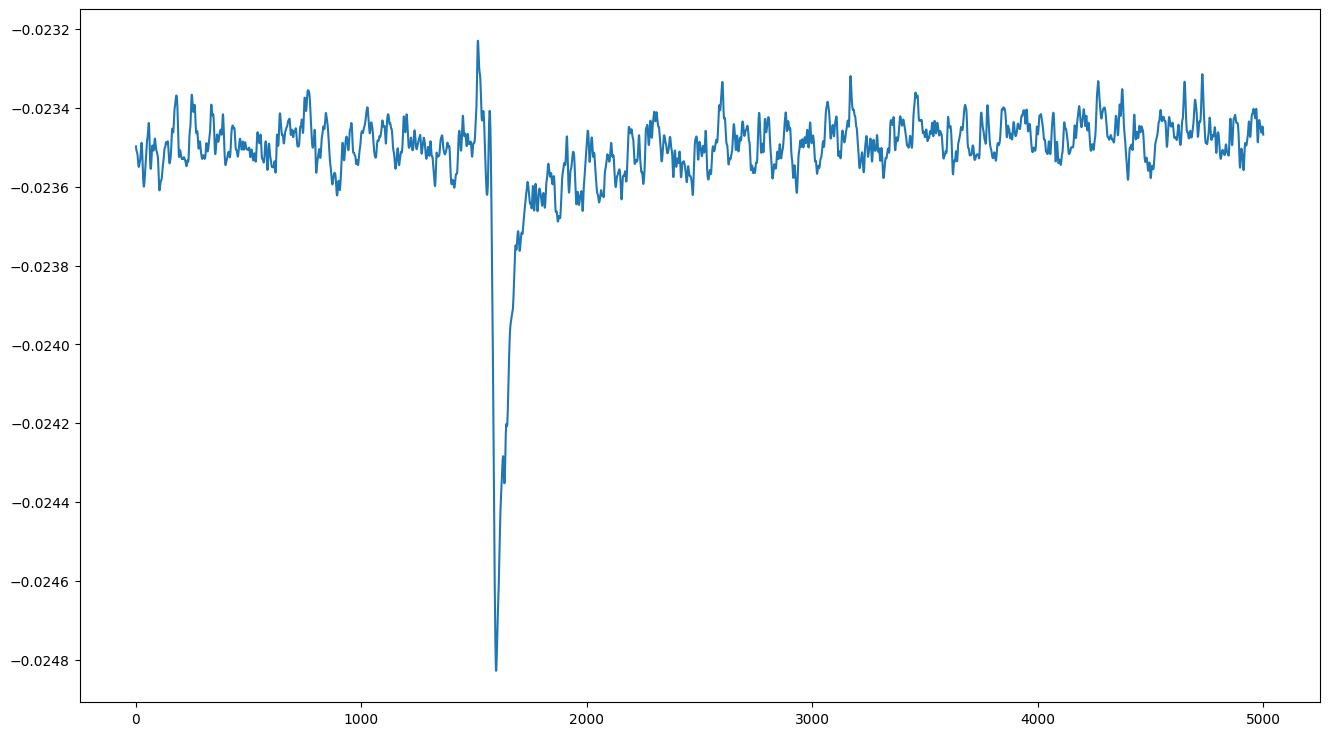

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter[400000:500000][5000:10000])

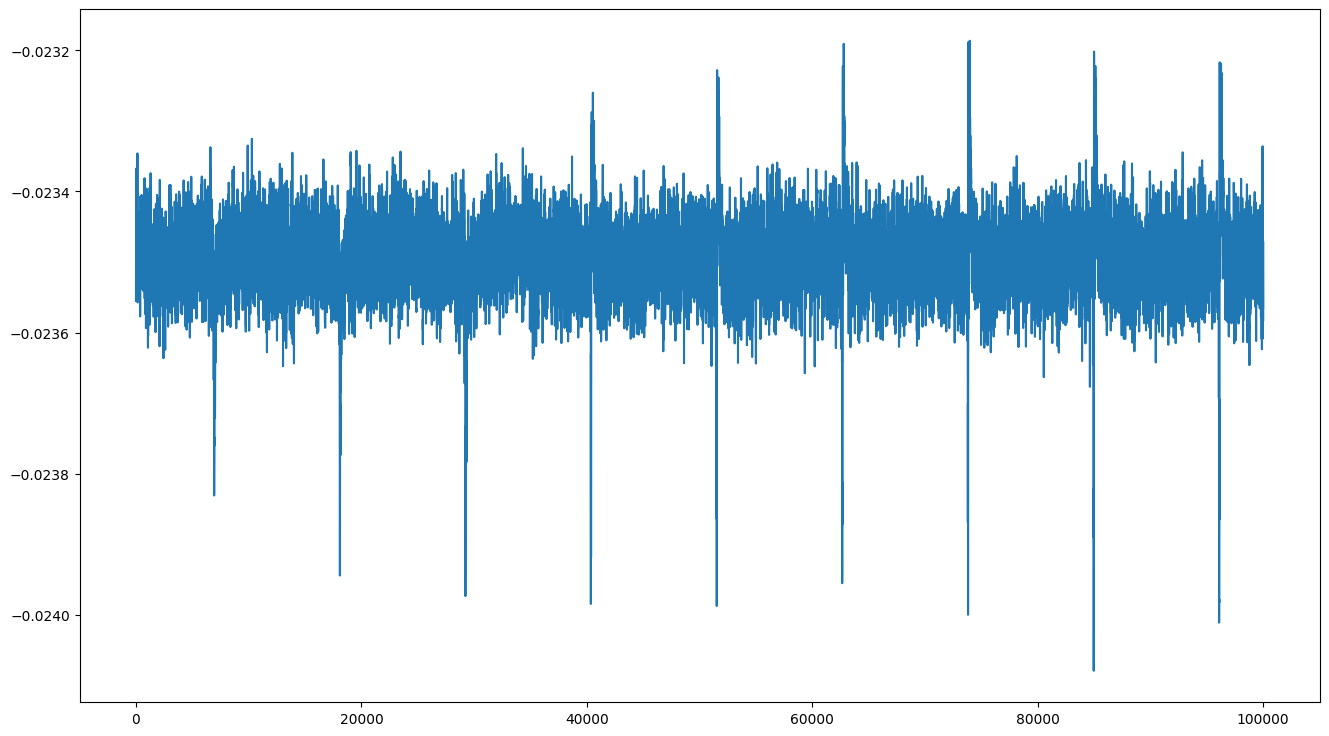

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter[500000:600000])

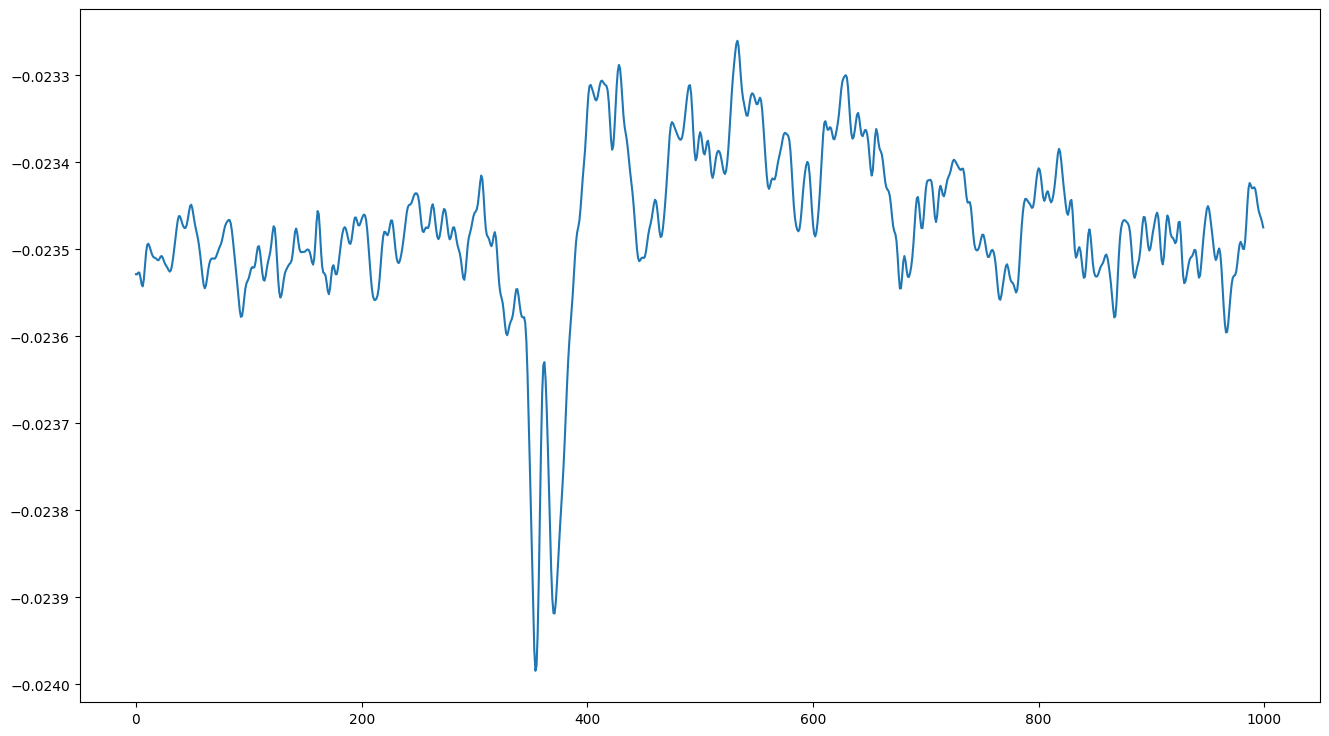

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter[500000:600000][40000:41000])

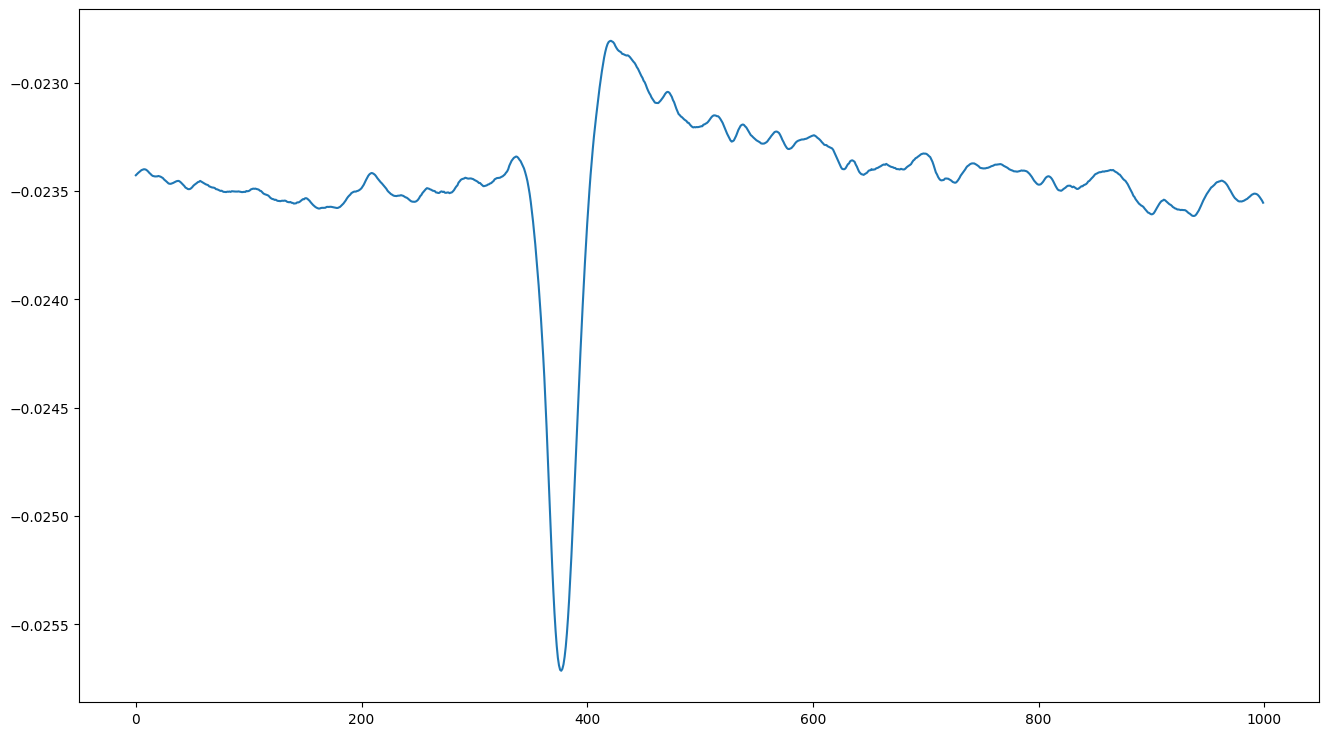

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data_no_filter[16000:17000])

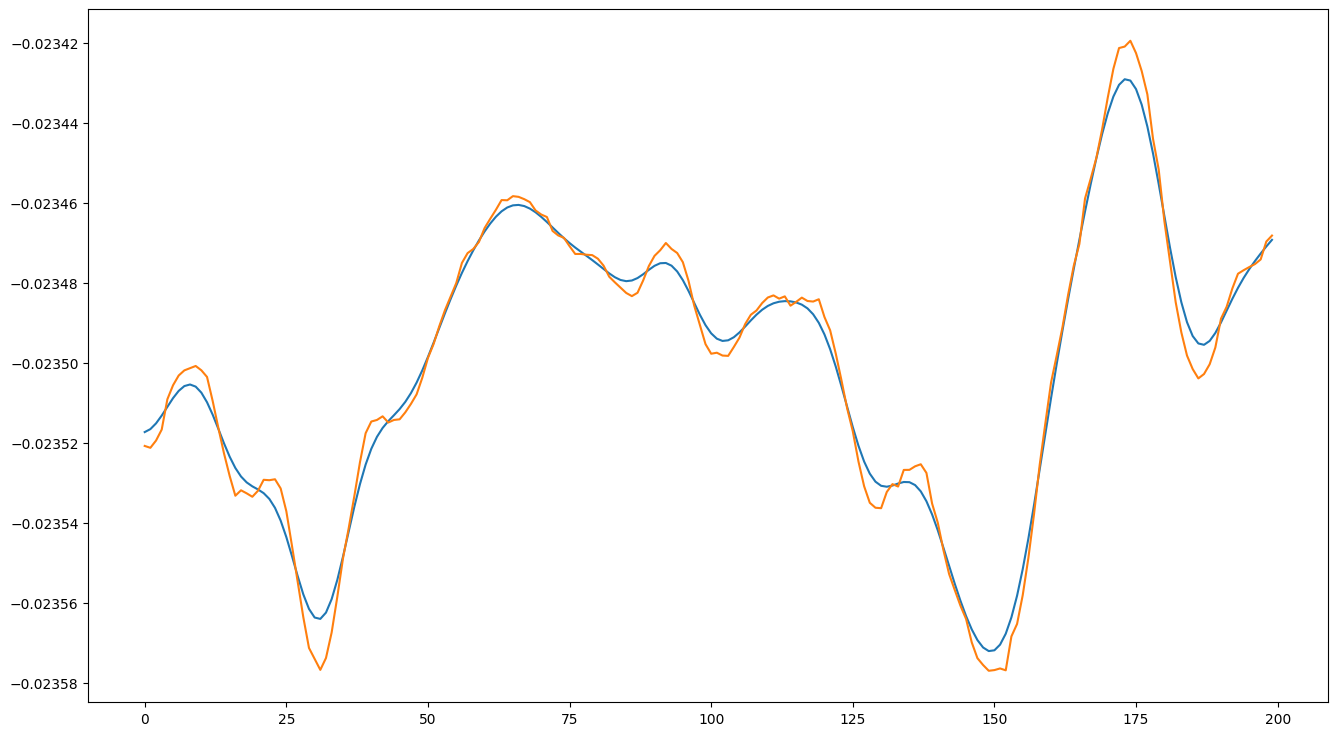

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(data[1000:1200])
plt.plot(data_no_filter[1000:1200])

Text(0.5, 0, 'time, ms^-2')

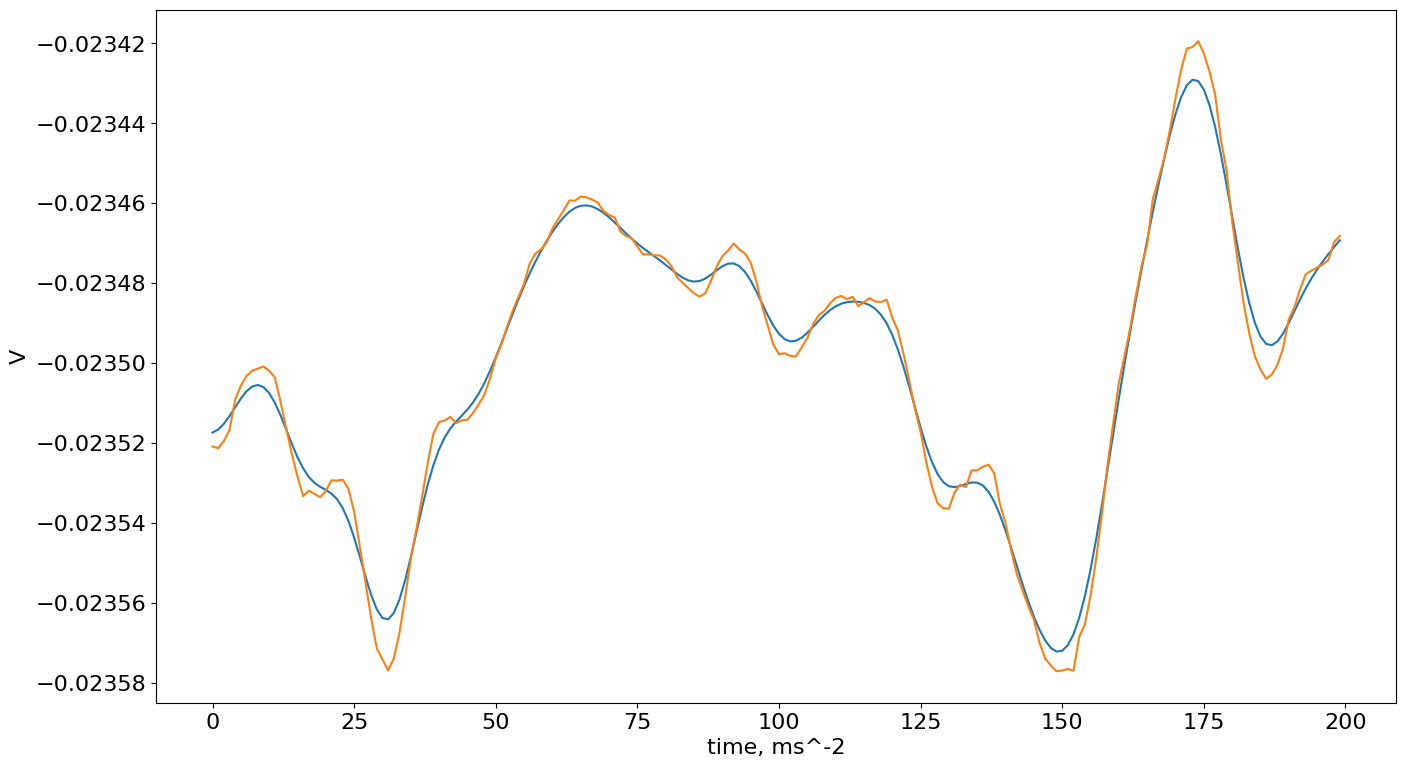

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(data[1000:1200])
ax.plot(data_no_filter[1000:1200])

ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms^-2",  fontsize = 16)

In [ ]:
data_filtered = gaussian_filter(data[::100] , sigma=2, radius=20)
data_resampled = sps.resample(data, len(data) // 100)

Text(0.5, 0, 'time, ms')

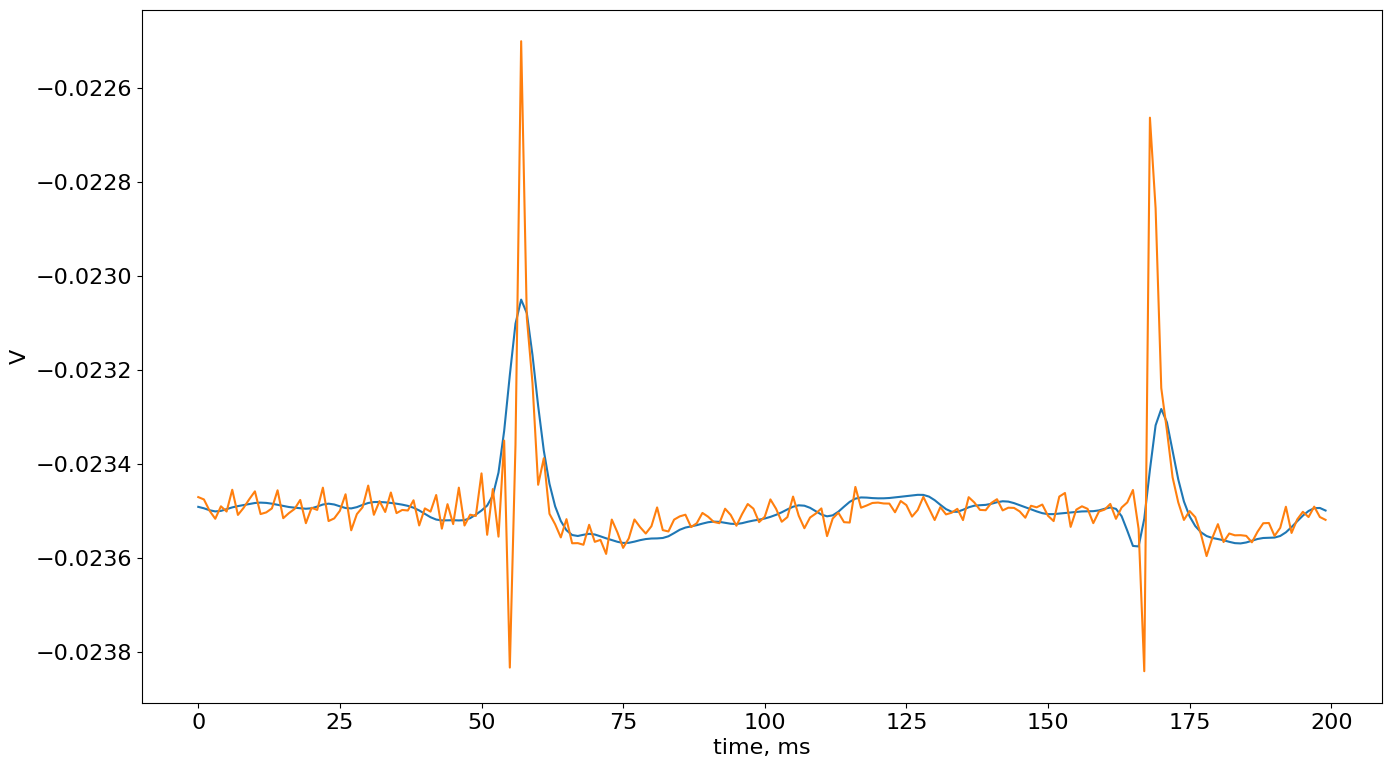

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(data_filtered[1000:1200])
ax.plot(data_resampled[1000:1200])

ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

Text(0.5, 0, 'time, ms')

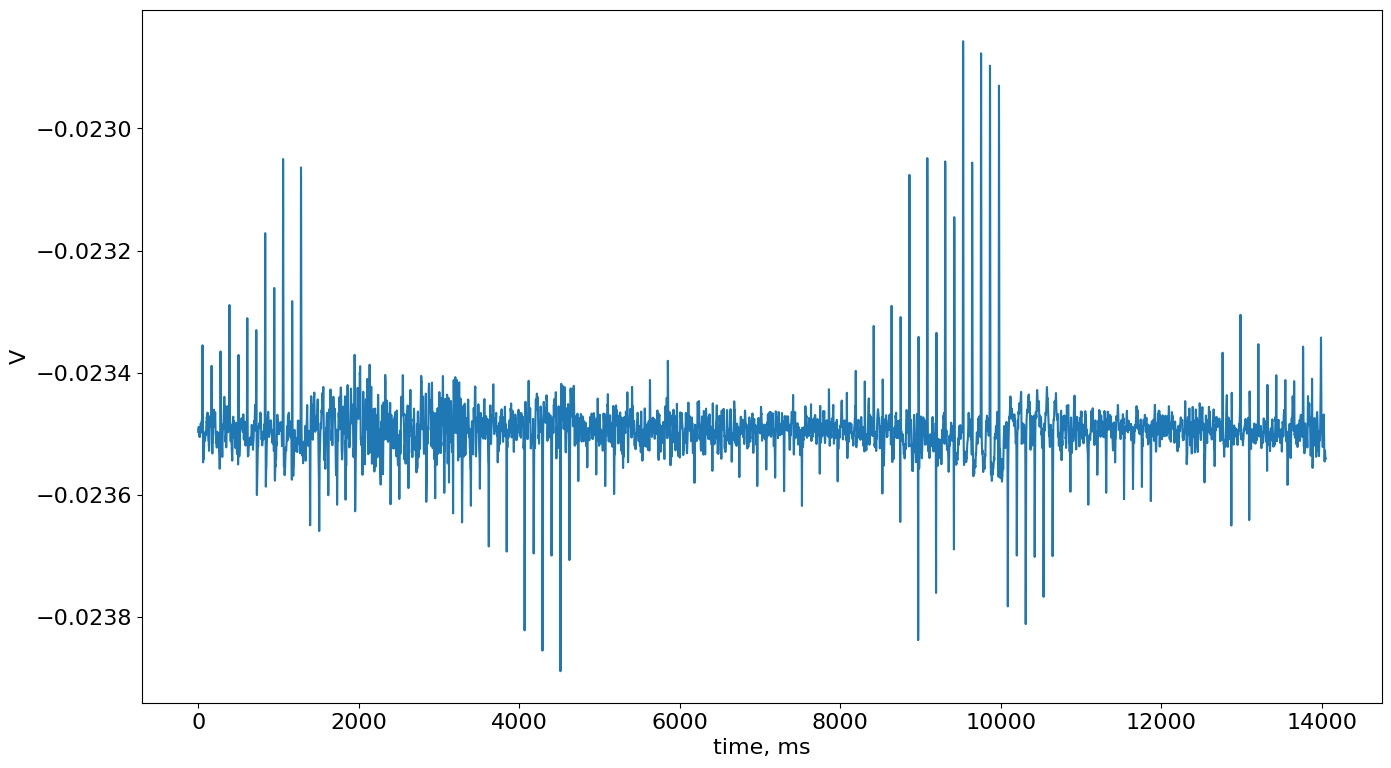

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(data_filtered)


ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

Text(0.5, 0, 'time, ms')

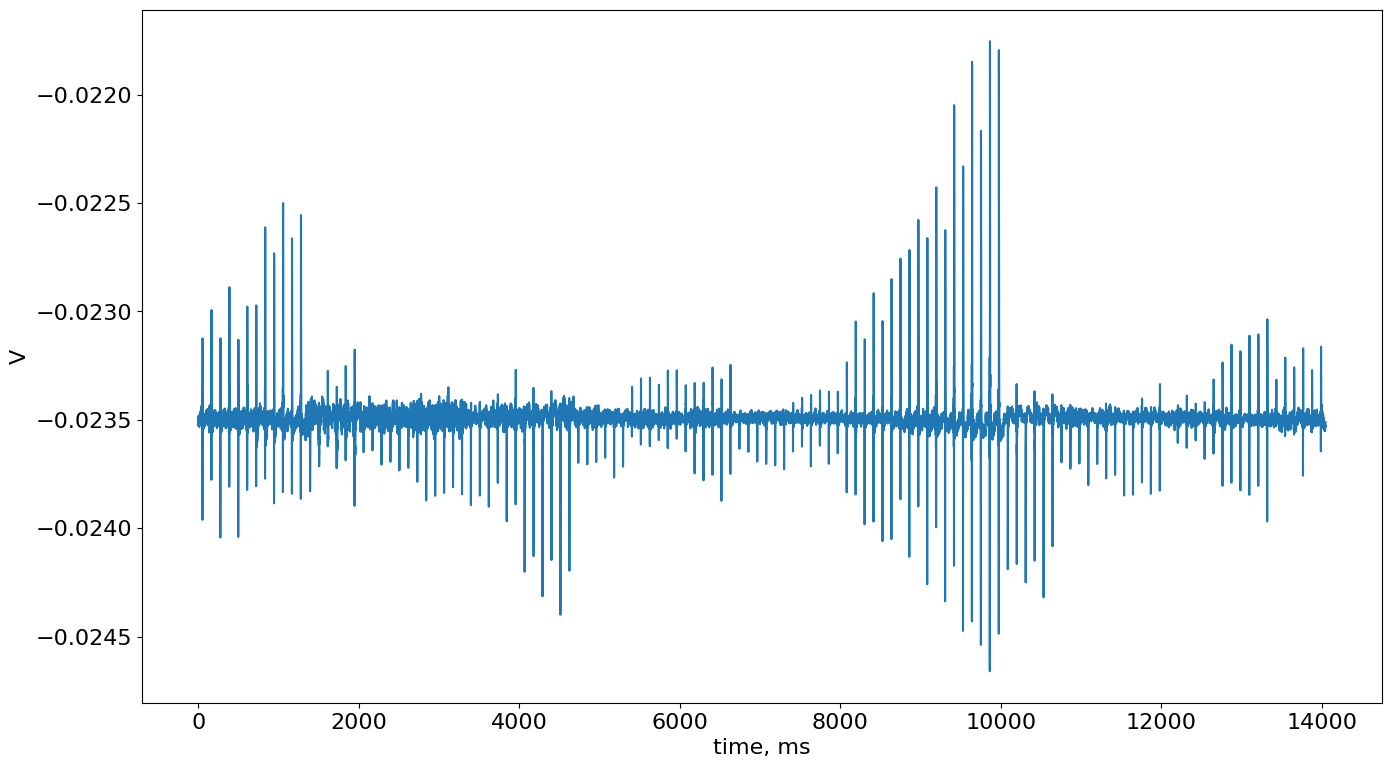

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.plot(data_resampled)

ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

In [ ]:
ca3_df = pd.read_csv("all_record_CA3.csv")
data_no_filter_ca3 = np.array(ca3_df['x'])
data_ca3 = gaussian_filter(data_no_filter_ca3, sigma=3, radius=20)

data_filtered_ca3 = gaussian_filter(data_ca3[::100] , sigma=2, radius=20)
data_resampled_ca3 = sps.resample(data_ca3, len(data_ca3) // 100)

Text(0.5, 0, 'time, ms')

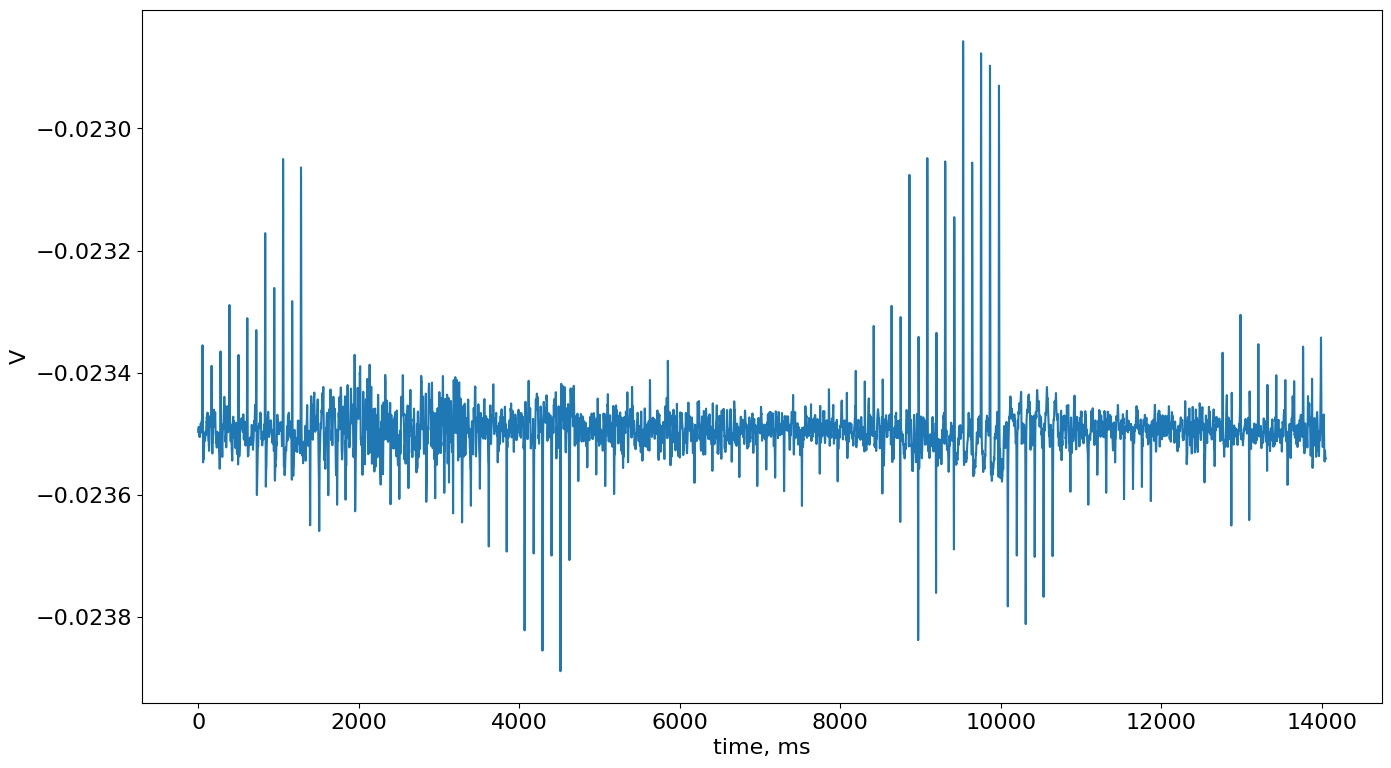

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.plot(data_filtered)


ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

Text(0.5, 0, 'time, ms')

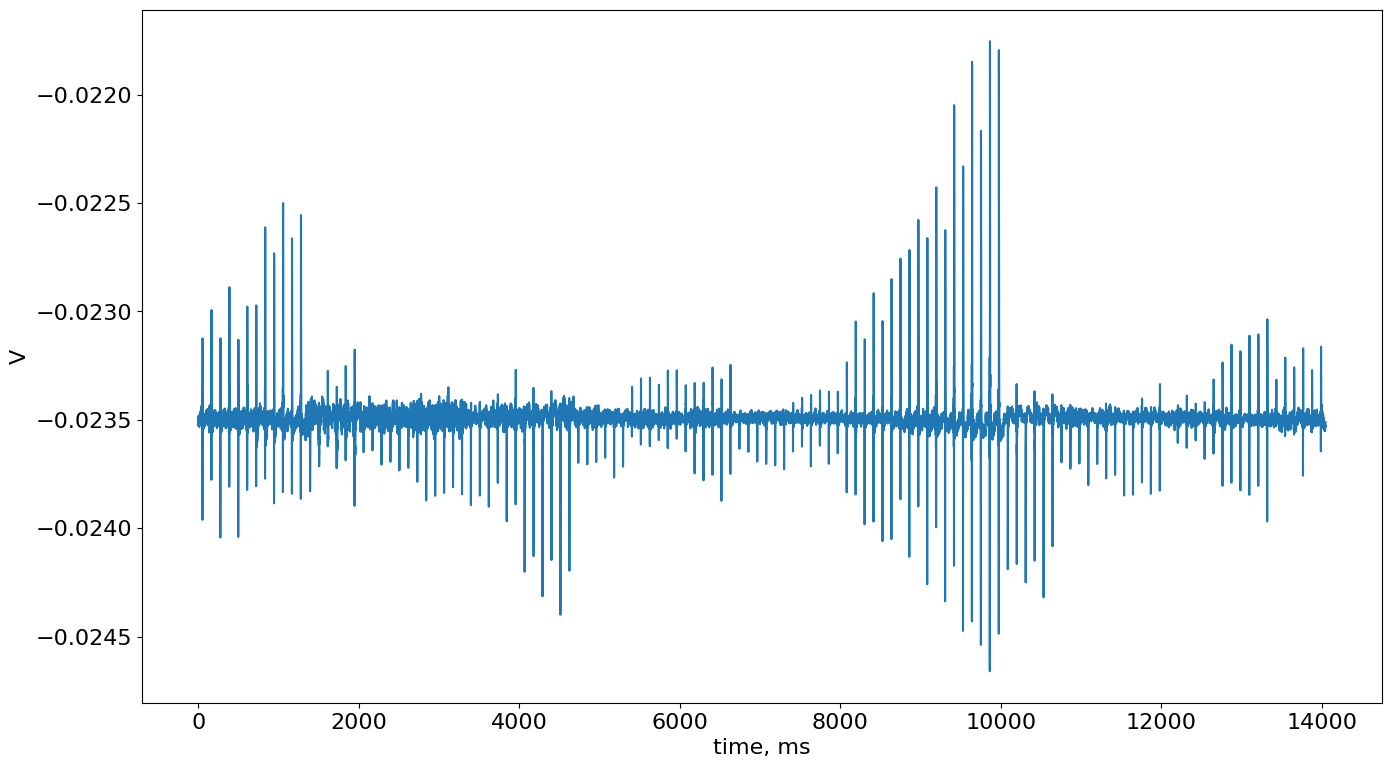

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.plot(data_resampled)

ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

## Сравнение Ca1 и Ca3


Text(0.5, 0, 'time, ms')

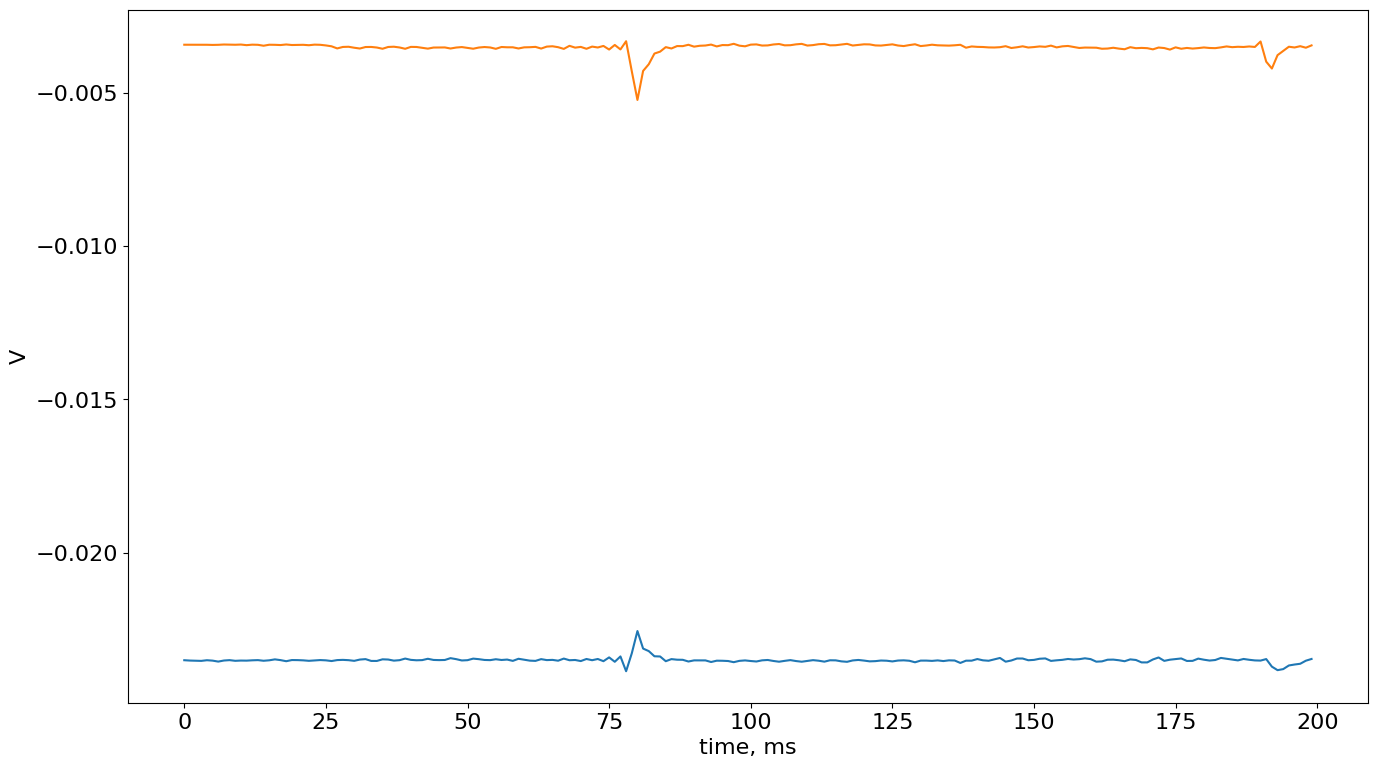

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.plot(data_resampled[1200:1400])
ax.plot(data_resampled_ca3[1200:1400])


ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

Text(0.5, 0, 'time, ms')

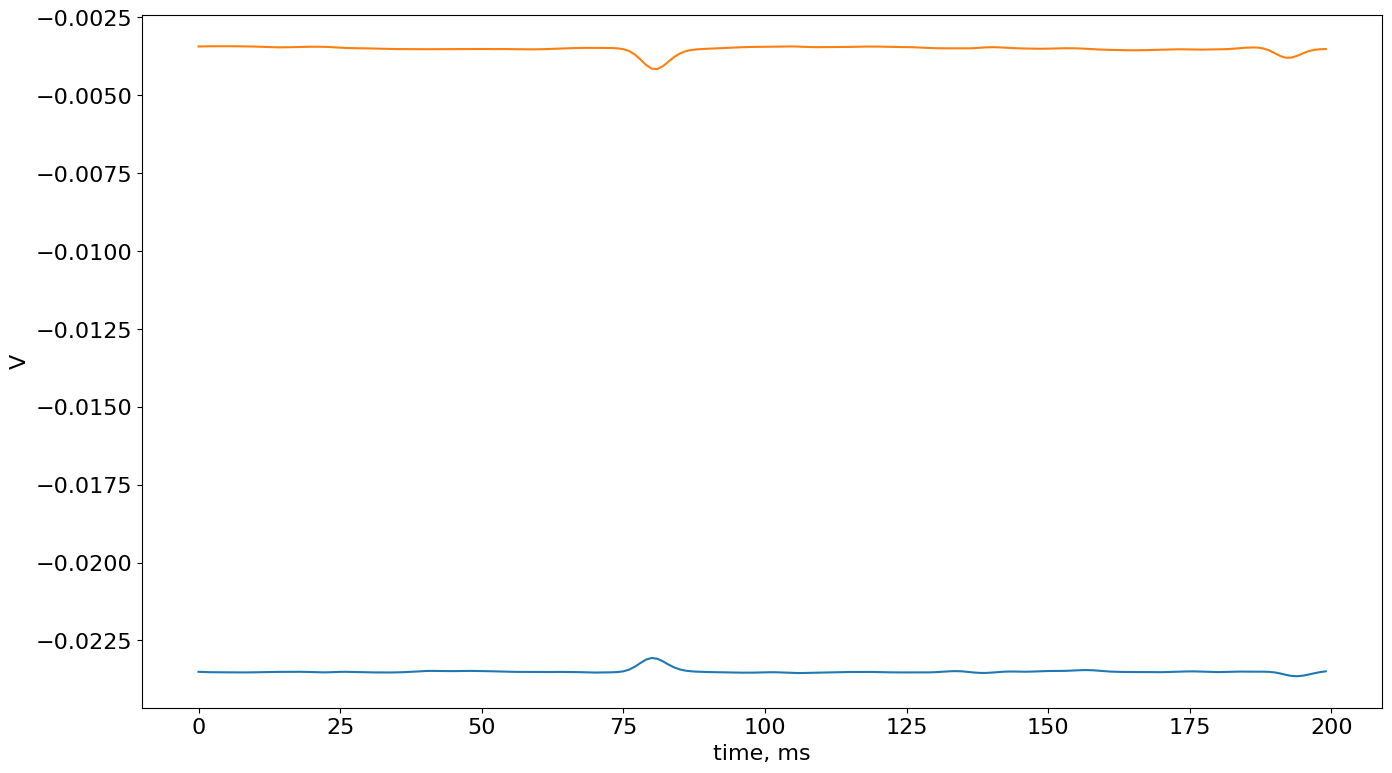

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

ax.plot(data_filtered[1200:1400])
ax.plot(data_filtered_ca3[1200:1400])


ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_title('LSTM')
ax.set_ylabel("V",  fontsize = 16)
ax.set_xlabel("time, ms",  fontsize = 16)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)


    def forward(self, x):
        batchsize = x.shape[0]

        # layer 1
        x = self.linear_1(x)
        x = self.relu(x)

        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # Floating
        x = h_n.permute(1, 0, 2).reshape(batchsize, -1)

        # layer 2
        x = self.dropout(x)
        predictions = self.linear_2(x)
        return predictions[:,-1]

In [ ]:
data_ca1 = data

In [ ]:
data_ca1.shape[0] / 5

280929.6

In [ ]:
lstm_train_ca1 = data_ca1[:-280929]
lstm_test_ca1 =  data_ca1[-280929:]

lstm_train_ca3 = data_ca3[:-280929]
lstm_test_ca3 =  data_ca3[-280929:]

mean_ca1 = lstm_train_ca1.mean()
std_ca1 = lstm_train_ca1.std()

mean_ca3 = lstm_train_ca3.mean()
std_ca3 = lstm_train_ca3.std()

train_norm_ca1 = (lstm_train_ca1 - mean_ca1)/std_ca1
test_norm_ca1 = (lstm_test_ca1 - mean_ca1)/std_ca1

train_norm_ca3 = (lstm_train_ca3 - mean_ca3)/std_ca3
test_norm_ca3 = (lstm_test_ca3 - mean_ca3)/std_ca3

train_norm_ca1 = torch.FloatTensor(train_norm_ca1).view(-1)
test_norm_ca1 = torch.FloatTensor(test_norm_ca1).view(-1)

train_norm_ca3 = torch.FloatTensor(train_norm_ca3).view(-1)
test_norm_ca3 = torch.FloatTensor(test_norm_ca3).view(-1)

In [ ]:
train_window = 50

def create_inout_sequences(input_data, target_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in tqdm(range(L-tw)):
        train_seq = input_data[i:i+tw + 1]
        train_label = target_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

train_inout_seq = create_inout_sequences(train_norm_ca3, train_norm_ca1, train_window)
test_inout_seq = create_inout_sequences(test_norm_ca3, test_norm_ca1, train_window)

100%|██████████| 280879/280879 [00:02<00:00, 121701.45it/s]


In [ ]:
train_dataloader = DataLoader(train_inout_seq, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_inout_seq, batch_size=64, shuffle=False, drop_last=True)

In [ ]:
model_lstm = LSTMModel(input_size=1, hidden_layer_size=100, num_layers=2, output_size=1, dropout=0.2)
model_lstm = model_lstm.to('cuda')

In [ ]:
def run_epoch(model, dataloader, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for idx, (x, y) in enumerate(tqdm(dataloader)):
        if is_training:
            optimizer.zero_grad()

        batchsize = x.shape[0]

        x = torch.reshape(x, (64, 51, 1)).to('cuda')
        y = y.view(-1).to('cuda')

        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += (loss.detach().item() / batchsize)


    return epoch_loss

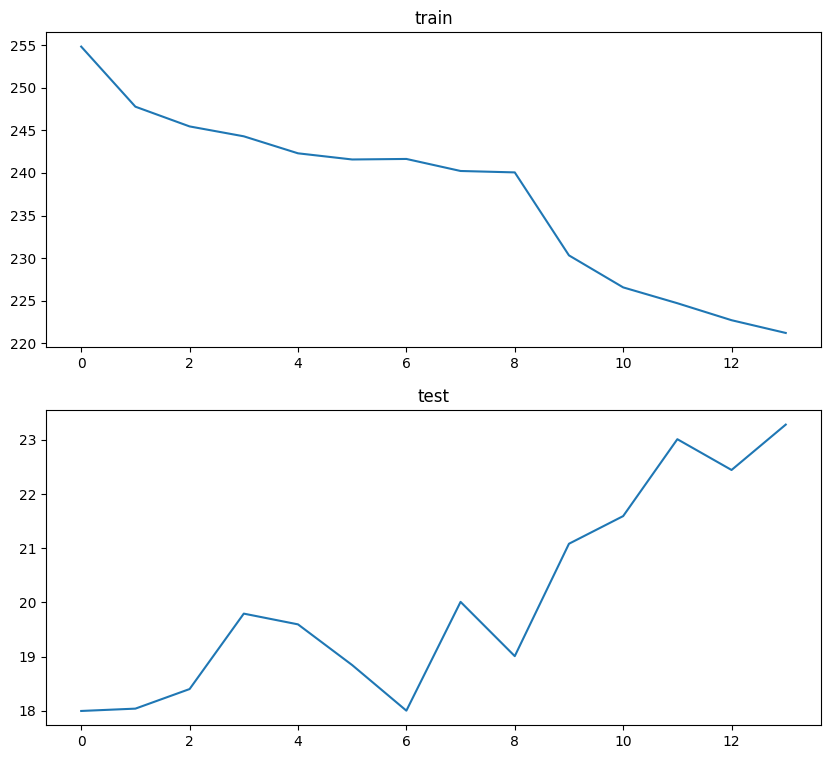

Epoch[14/150] | loss train:221.229737, test:23.279229


 10%|█         | 1828/17557 [00:07<01:08, 228.54it/s]


KeyboardInterrupt: ignored

In [ ]:
# define optimizer and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-9)
lr = 0.001
epochs = 150

losses_train = []
losses_test = []
best_loss = 10e9

# begin training
for epoch in range(epochs):
    if epoch > 8:
      lr = 0.0001
    if epoch > 20:
      lr = 0.00005
    optimizer = optim.Adam(model_lstm.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-9)
    loss_train = run_epoch(model_lstm, train_dataloader, is_training=True)
    loss_val = run_epoch(model_lstm, test_dataloader)
    losses_train.append(loss_train)
    losses_test.append(loss_val)

    if losses_test[-1] < best_loss:
        best_loss = losses_test[-1]
        torch.save(model_lstm.state_dict(), "./LSTMCA1_CA3PRED")

    clear_output(True)
    fig = plt.figure(figsize=(10, 9))

    ax_1 = fig.add_subplot(2, 1, 1)
    ax_2 = fig.add_subplot(2, 1, 2)
    ax_1.set_title('train')
    ax_1.plot(losses_train)
    ax_2.set_title('test')
    ax_2.plot(losses_test)
    plt.show()

    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f}'
              .format(epoch+1, epochs, loss_train, loss_val))

In [ ]:
model_lstm.load_state_dict(torch.load("./LSTMCA1_CA3PRED"))

<All keys matched successfully>

In [ ]:
def GetRmse(model, train_dataloader, val_dataloader, lstm_test, std, mean, l):
    model.eval()

    rmse = []

    lstm_predicts = []
    for k in tqdm(range(1, l+1)):
        test_right_part = (len(lstm_test)- 51)%64
        predicted_val = np.array([])
        for idx, (x, y) in enumerate(val_dataloader):
            x = torch.reshape(x, (64, 51, 1)).to('cuda')
            cur_x = x
            for _ in range(k):
                out = model(cur_x.to('cuda'))
                cur_x = torch.hstack((cur_x[:, 1:], torch.reshape(out, (64, 1, 1))))
            predicted_val = np.concatenate((predicted_val, cur_x[:, -1, 0].cpu().detach().numpy()))

        lstm_predicts.append(np.array(predicted_val)*std+mean)
        if k == 1:
            r = (((np.array(predicted_val)*std+mean - np.array(lstm_test[51:-test_right_part]))**2).mean())**0.5
        else:
            r = (((np.array(predicted_val[:-k+1])*std+mean - np.array(lstm_test[20+k-1:-test_right_part]))**2).mean())**0.5
        rmse.append(r)
    return rmse, lstm_predicts

In [ ]:
rmse_chaos, lstm_predicts = GetRmse(model_lstm, train_dataloader, test_dataloader, lstm_test_ca1, std_ca1, mean_ca1, 1)

100%|██████████| 1/1 [00:07<00:00,  7.19s/it]


In [ ]:
rmse_chaos

[5.4687910225709035e-05]

In [ ]:
# np.save("predicts/lstm_filtered_rmse", np.array(rmse_chaos))
# for i in range(len(lstm_predicts)):
#     np.save("predicts/lstm_filtered_predict_" + str(i), lstm_predicts[i])

In [ ]:
def Plt(k):
    #k = 5
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


    ax.plot( lstm_test_ca1[51+k-1: ], linewidth = 3, label='истинные')
    #ax.plot(list(range(0, 10000, 10)), lstm_predicts[k-1][:1000],  linestyle = (0, (5, 10)), linewidth = 3, label='предсказанные', color="red")
    ax.plot( lstm_predicts[k-1],  linestyle = '--', linewidth = 3, label='предсказанные', color="red")

    ax.legend(fontsize = 16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_title('LSTM')
    ax.set_ylabel("V, мВ",  fontsize = 16)
    ax.set_xlabel("время, мс",  fontsize = 16)


    plt.show()


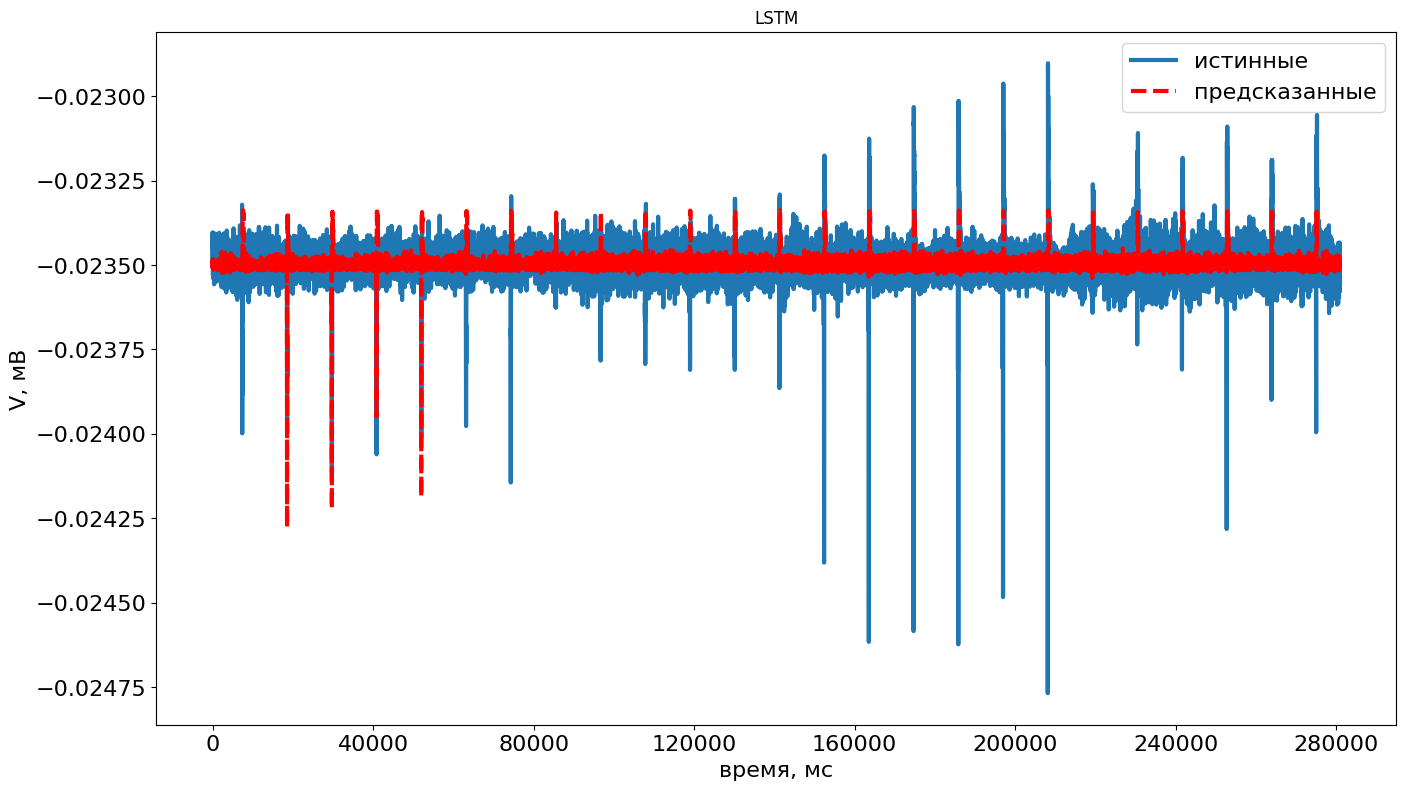

In [ ]:
Plt(1)